In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1, ) #2d array into 1d array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

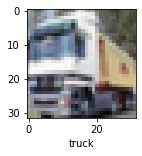

In [34]:
def plot_sample(X,y, index):
    plt.figure(figsize=(3,2))
    plt.imshow(X[index])
    
    plt.xlabel(classes[y[index]])
    
plot_sample(X_train, y_train, 1)

In [16]:
X_train = X_train /255
X_test = X_test /255

In [19]:
model = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000,  activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')    
])

#tensorboard
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)
model.compile(
    optimizer = 'SGD',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    
model.fit(X_train, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1563/1563 [==============================] - 111s 70ms/step - loss: 1.9347 - accuracy: 0.3074
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6473 - accuracy: 0.4173
Epoch 3/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5517 - accuracy: 0.4537
Epoch 4/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4956 - accuracy: 0.4748
Epoch 5/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.4412 - accuracy: 0.4907


In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4605 - accuracy: 0.4815


[1.4604711532592773, 0.4814999997615814]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(X_test)

y_pred_classes = [np.argmax(each) for each in y_pred]

print("Classification Report\n", classification_report(y_test, y_pred_classes))

Classification Report
               precision    recall  f1-score   support

           0       0.51      0.58      0.54      1000
           1       0.52      0.73      0.61      1000
           2       0.37      0.38      0.38      1000
           3       0.31      0.48      0.38      1000
           4       0.58      0.19      0.29      1000
           5       0.49      0.24      0.32      1000
           6       0.44      0.65      0.53      1000
           7       0.71      0.40      0.51      1000
           8       0.60      0.64      0.62      1000
           9       0.54      0.52      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [26]:
cnn = models.Sequential([
    #cnn layer 1
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    #cnn layer 2
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')    
])

In [27]:
#tensorboard
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)

cnn.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
cnn.fit(X_train, y_train, epochs = 10, callbacks = [tb_callback])

Epoch 1/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.4214 - accuracy: 0.4911
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1399 - accuracy: 0.6000
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0145 - accuracy: 0.6497
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9374 - accuracy: 0.6750
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8745 - accuracy: 0.6973
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8225 - accuracy: 0.7136
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7770 - accuracy: 0.7285
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7434 - accuracy: 0.7399
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7118 - accuracy: 0.7511
Epoch 10/10
1563/1563 [==============================] - 50s 32m

In [31]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9188 - accuracy: 0.6929


[0.9187758564949036, 0.6929000020027161]

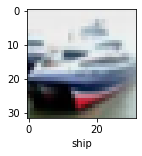

In [35]:
y_test = y_test.reshape(-1, )
plot_sample(X_test, y_test, 1)

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.1041527e-03, 2.8805441e-04, 1.0774211e-03, 6.1618716e-01,
        3.4899390e-03, 1.9858982e-01, 1.7640220e-01, 5.2850584e-05,
        1.1080361e-03, 7.0035522e-04],
       [4.7116831e-02, 6.7008011e-02, 5.5495593e-07, 9.3286246e-07,
        1.8705208e-07, 8.5461265e-09, 1.7830081e-08, 3.3519004e-08,
        8.8151592e-01, 4.3574614e-03],
       [7.5497366e-02, 5.2881914e-01, 1.7305585e-03, 5.5305408e-03,
        1.6945457e-03, 5.3377164e-04, 3.2071731e-04, 2.8141621e-03,
        3.4650308e-01, 3.6556080e-02],
       [8.3576107e-01, 7.3516960e-03, 1.8855793e-03, 2.1127188e-03,
        4.4129213e-04, 2.5690667e-04, 7.6905446e-04, 2.7418812e-04,
        1.5107088e-01, 7.6554825e-05],
       [4.9276309e-06, 1.8436655e-04, 5.1821914e-02, 1.2624202e-02,
        4.0117067e-01, 4.0451186e-03, 5.3006852e-01, 7.5106342e-05,
        4.9041532e-06, 1.7297440e-07]], dtype=float32)

In [39]:
y_pred_classes = [np.argmax(each) for each in y_pred]
y_pred_classes[:5]

[3, 8, 1, 0, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

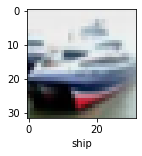

In [41]:
plot_sample(X_test, y_test, 1)

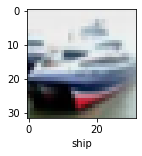

In [40]:
plot_sample(X_test, y_pred_classes, 1)

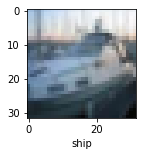

In [45]:
plot_sample(X_test, y_test, 2)

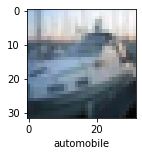

In [46]:
plot_sample(X_test, y_pred_classes, 2)